## <font size=4> *Métodos Numéricos II*, 2023 </font>
## <font size=3 color='gray'> Alan Reyes-Figueroa </font>

# Generación de Gaussianas Multivariadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Generar variables aleatorias gaussianas con $\mu, \Sigma$ prescrita

In [3]:
n = 5000

In [4]:
mu0 = np.zeros(3)
sig0 = np.eye(3)

Z = np.random.multivariate_normal(mu0, sig0, size=n)

In [5]:
Z.shape

(5000, 3)

In [6]:
Z[:10]

array([[-0.00487891,  0.95502141, -1.70122683],
       [ 0.86738416, -0.45847518,  0.99445102],
       [-0.71347753,  0.13493894,  1.56283705],
       [-0.63185564,  0.90455243, -1.27472296],
       [-1.15771541, -0.4418342 ,  0.83638175],
       [-0.84871506, -0.52655615, -0.53549681],
       [ 0.27908765, -1.90671167, -0.84669852],
       [-0.49073816,  0.52090328,  0.61223321],
       [-0.36765243,  0.85844612,  0.97102937],
       [ 0.43281356,  0.7551985 , -0.58067822]])

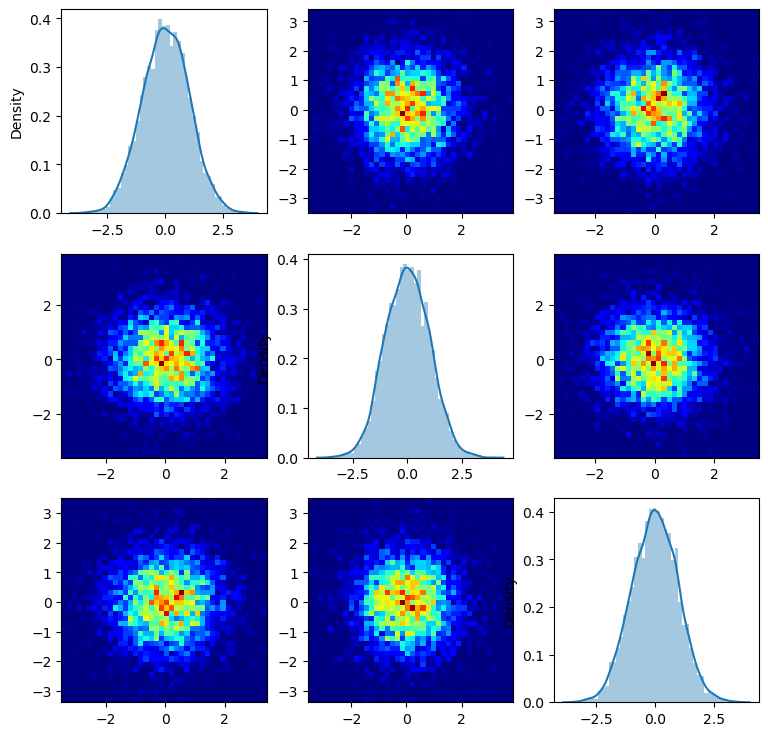

In [7]:
plt.figure(figsize=(9,9))
for i in range(0, 3):
    for j in range(0, 3):
        plt.subplot(3, 3, 3*i+j+1)
        if (i==j):
            sns.distplot(Z[:,i], kde=True)
        else:
            plt.hist2d(Z[:,j], Z[:,i], bins=(40,40), cmap=plt.cm.jet)
plt.show()

In [8]:
Z.mean(axis=0)

array([ 0.0288619 ,  0.0149913 , -0.00272912])

In [9]:
CovZ = np.corrcoef(Z.T)

In [10]:
np.round(CovZ, 3)

array([[ 1.   , -0.016,  0.006],
       [-0.016,  1.   , -0.025],
       [ 0.006, -0.025,  1.   ]])

In [11]:
Sig = np.array([[1.0,  0.3,  -0.2],
                [0.3,  1.0,  -0.6], 
                [-0.2, -0.6, 1.0]])

In [12]:
mu = np.array([1, 2, -0.5])

In [13]:
np.linalg.eig(Sig)

(array([1.76432988, 0.84554074, 0.39012938]),
 array([[ 0.42139074,  0.8962966 , -0.13813849],
        [ 0.65651758, -0.19641441,  0.72828981],
        [-0.6256313 ,  0.39758493,  0.67120169]]))

In [14]:
from LLT_LDLT import Cholesky

In [15]:
Chol = Cholesky(Sig)

In [16]:
X = mu + (Z @ Chol)

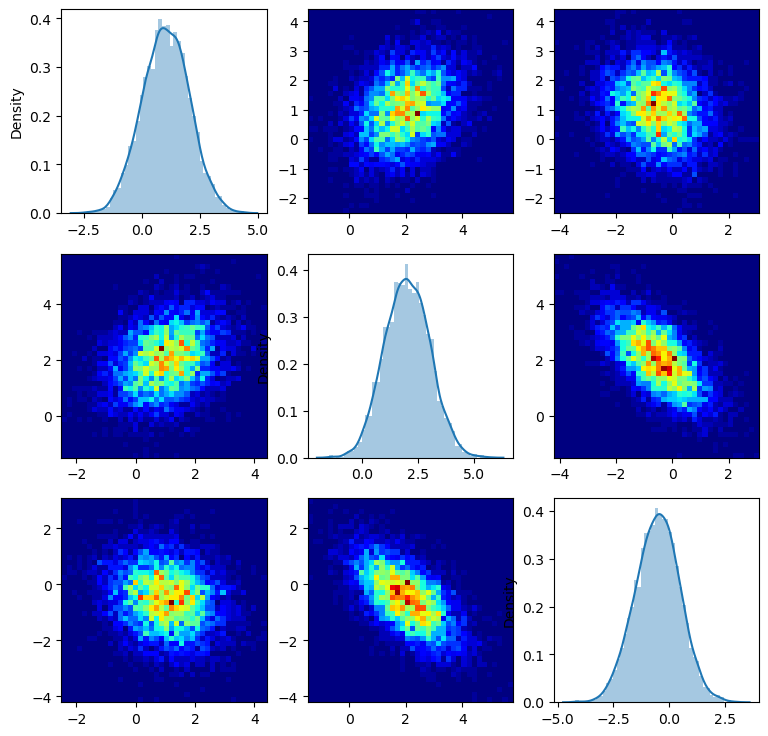

In [17]:
plt.figure(figsize=(9,9))
for i in range(0, 3):
    for j in range(0, 3):
        plt.subplot(3, 3, 3*i+j+1)
        if (i==j):
            sns.distplot(X[:,i], kde=True)
        else:
            plt.hist2d(X[:,j], X[:,i], bins=(40,40), cmap=plt.cm.jet)
plt.show()

In [18]:
X.mean(axis=0)

array([ 1.0288619 ,  2.02295936, -0.51644111])

In [19]:
CovX = np.corrcoef(X.T)

In [20]:
np.round(CovX, 4)

array([[ 1.    ,  0.2863, -0.1881],
       [ 0.2863,  1.    , -0.6191],
       [-0.1881, -0.6191,  1.    ]])